In [19]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def generate_bracelet(i, j, k):
    """
    This function generates a number bracelet starting with i and j modulo k

    :param i: 1st number
    :param j: 2nd number
    :param k: modulo we are taking
    :return: list of the number bracelet
    """
    bracelet = [i, j]
    while True:
        new_term = (bracelet[-1] + bracelet[-2]) % k
        if new_term == bracelet[1] and bracelet[-1] == bracelet[0]:
            break
        else:
            bracelet.append(new_term)
    return bracelet[:-1]

generate_bracelet(1, 5, 10)

[1,
 5,
 6,
 1,
 7,
 8,
 5,
 3,
 8,
 1,
 9,
 0,
 9,
 9,
 8,
 7,
 5,
 2,
 7,
 9,
 6,
 5,
 1,
 6,
 7,
 3,
 0,
 3,
 3,
 6,
 9,
 5,
 4,
 9,
 3,
 2,
 5,
 7,
 2,
 9,
 1,
 0,
 1,
 1,
 2,
 3,
 5,
 8,
 3,
 1,
 4,
 5,
 9,
 4,
 3,
 7,
 0,
 7,
 7,
 4]

In [21]:
def generate_bracelet_length(i, j, k):
    """
    This function returns the lenght of the number bracelet starting with i and j modulo k

    :param i: 1st number
    :param j: 2nd number
    :param k: modulo we are taking
    :return: list of the number bracelet
    """
    length = len(generate_bracelet(i, j, k))
    return length

# Generate and display a DataFrame with bracelet lengths based on starting number pairs
bracelet_data = []
for i in range(10):
    for j in range(10):
        length = generate_bracelet_length(i, j, 10)
        bracelet_data.append({'Starting Numbers': (i, j), 'Length': length})
bracelets_length_df = pd.DataFrame(bracelet_data)
bracelets_length_df

,Starting Numbers,Length
0,"(0, 0)",1
1,"(0, 1)",60
2,"(0, 2)",20
3,"(0, 3)",60
4,"(0, 4)",20
...,...,...
95,"(9, 5)",60
96,"(9, 6)",60
97,"(9, 7)",12
98,"(9, 8)",60


In [22]:
bracelets_length_df['Length'].value_counts()

60    60
20    20
12    12
4      4
3      3
1      1
Name: Length, dtype: int64

In [23]:
# Generate and display a DataFrame with bracelet based on starting number pairs
bracelet_data = []
for i in range(10):
    for j in range(10):
        chain = generate_bracelet(i, j, 10)
        bracelet_data.append({'Starting Numbers': (i, j), 'Chain': chain})
bracelets_df = pd.DataFrame(bracelet_data)
bracelets_df

,Starting Numbers,Chain
0,"(0, 0)",[0]
1,"(0, 1)","[0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, ..."
2,"(0, 2)","[0, 2, 2, 4, 6, 0, 6, 6, 2, 8, 0, 8, 8, 6, 4, ..."
3,"(0, 3)","[0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, ..."
4,"(0, 4)","[0, 4, 4, 8, 2, 0, 2, 2, 4, 6, 0, 6, 6, 2, 8, ..."
...,...,...
95,"(9, 5)","[9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1, 1, 2, ..."
96,"(9, 6)","[9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, ..."
97,"(9, 7)","[9, 7, 6, 3, 9, 2, 1, 3, 4, 7, 1, 8]"
98,"(9, 8)","[9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, ..."


In [24]:
def chain_check(chain1, chain2, length):
    """
    Param chain1: chain 1 we are comparing
    Param chain2: chain 2 we are comparing
    Pram length: Length of the two chains.

    Returns: a boolean, which is True if the chains are the same and False if not.
    """
    if len(chain1) != length or len(chain2) != length:
        return False

    initial_pair = chain1[0:2]

    for i in range(length):
        if (chain2[i] == initial_pair[0]) and (chain2[(i + 1) % length] == initial_pair[1]):

            new_chain = chain2[i:] + chain2[:i]
            if new_chain == chain1:
                return True

            new_chain_flipped = new_chain[::-1]
            if new_chain_flipped == chain1:
                return True

    return False

def chain_unique(same_length_chains):
    """
    Param same_length_chains: list of chains of the same length

    Returns: a boolean which is True if there is only one type of chain present and False otherwise.
    """
    if len(same_length_chains) <= 1:
        return True

    first_chain = same_length_chains[0]
    chain_length = len(first_chain)
    chains_same = True

    for chain in same_length_chains[1:]:
        if not chain_check(first_chain, chain, chain_length):
            chains_same = False
            break
    return chains_same

In [25]:
#Creating lists of chains with the same lengths as obviously if the lenght is different the chain cant be the same.

chain_60 = []
chain_20 = []
chain_12 = []
chain_4 = []
chain_3 = []
chain_1 = []

for i in range(10):
    for j in range(10):
        if generate_bracelet_length(i, j, 10) == 60:
            chain_60.append(generate_bracelet(i, j, 10))
        if generate_bracelet_length(i, j, 10) == 20:
            chain_20.append(generate_bracelet(i, j, 10))
        if generate_bracelet_length(i, j, 10) == 12:
            chain_12.append(generate_bracelet(i, j, 10))
        if generate_bracelet_length(i, j, 10) == 4:
            chain_4.append(generate_bracelet(i, j, 10))
        if generate_bracelet_length(i, j, 10) == 3:
            chain_3.append(generate_bracelet(i, j, 10))
        if generate_bracelet_length(i, j, 10) == 1:
            chain_1.append(generate_bracelet(i, j, 10))

# Replace 60 with desired length to check the same thing
print('There is one 60 chain: ' + str(chain_unique(chain_60)))

There is one 60 chain: True


In [26]:
def max_length(k):
    bracelet_data = []
    for i in range(k):
        for j in range(k):
            length = generate_bracelet_length(i, j, k)
            bracelet_data.append(length)
    return max(bracelet_data)

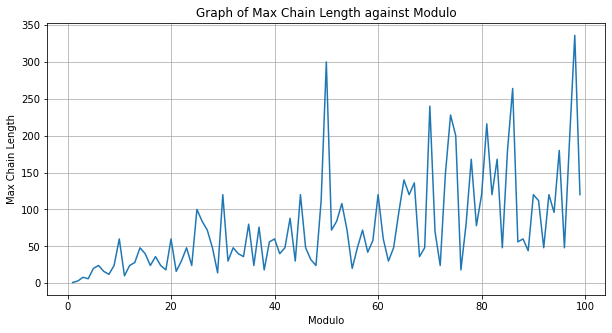

In [27]:
x_values = np.arange(1, 100)
y_values = [max_length(x) for x in x_values]

# Plotting the graph of y against x
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values)
plt.title('Graph of Max Chain Length against Modulo')
plt.xlabel('Modulo')
plt.ylabel('Max Chain Length')
plt.grid(True)
plt.show()